<a href="https://colab.research.google.com/github/Srikanth-Kb/MNIST_Recognition/blob/master/mnist_recognition_train_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset=training_dataset,batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=100,shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

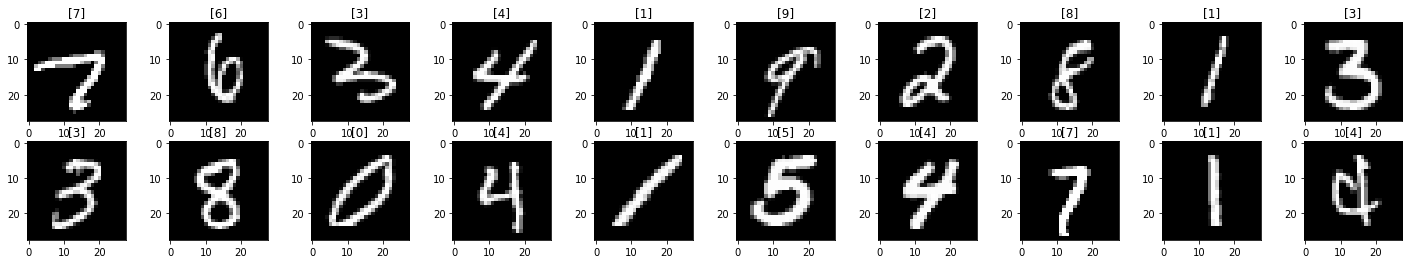

In [5]:
dataiter=iter(training_loader)
images,labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2,10,i+1)
  plt.imshow(im_convert(images[i]))
  ax.set_title([labels[i].item()])
  


In [0]:
class Classifier(nn.Module):
  def __init__(self,D_in,H1,H2,D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in,H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x
    

In [0]:
model = Classifier(784, 125, 65, 10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [9]:
epochs = 12
running_loss_history = []
running_correct_history = list()
validation_loss_history = []
validation_accuracy_history = []

for e in range(epochs):
  running_loss = 0.0 
  running_corrects = 0.0
  val_running_loss = 0.0  
  val_running_corrects = 0.0
  for inputs,labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, prediction = torch.max(outputs,1)
    running_corrects+=torch.sum(prediction == labels.data)
    running_loss+=loss.item()
  else:
    with torch.no_grad():
      
      for val_inputs,val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0],-1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds= torch.max(val_outputs,1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds==val_labels.data)
        
    
    
    print('epoch number:',e)
    
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_correct_history.append(epoch_acc)
    print('training loss:{:.4f},acc:{:.4f}'.format(epoch_loss, epoch_acc.item()))
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    validation_loss_history.append(val_epoch_loss)
    validation_accuracy_history.append(val_epoch_acc)
    print('validation loss:{:.4f},acc:{:.4f}'.format(val_epoch_loss,val_epoch_acc.item()))

    

epoch number: 0
training loss:0.9680,acc:76.0250
validation loss:0.4307,acc:88.6700
epoch number: 1
training loss:0.3832,acc:89.4217
validation loss:0.3230,acc:91.0200
epoch number: 2
training loss:0.3189,acc:90.8383
validation loss:0.2851,acc:91.9200
epoch number: 3
training loss:0.2835,acc:91.8133
validation loss:0.2571,acc:92.5900
epoch number: 4
training loss:0.2575,acc:92.5750
validation loss:0.2376,acc:93.3100
epoch number: 5
training loss:0.2343,acc:93.2400
validation loss:0.2161,acc:93.7300
epoch number: 6
training loss:0.2148,acc:93.8583
validation loss:0.2020,acc:94.0700
epoch number: 7
training loss:0.1994,acc:94.2933
validation loss:0.1922,acc:94.4600
epoch number: 8
training loss:0.1851,acc:94.6833
validation loss:0.1756,acc:94.8600
epoch number: 9
training loss:0.1717,acc:95.0367
validation loss:0.1665,acc:94.9300
epoch number: 10
training loss:0.1605,acc:95.3350
validation loss:0.1559,acc:95.2800
epoch number: 11
training loss:0.1492,acc:95.6550
validation loss:0.1534,ac

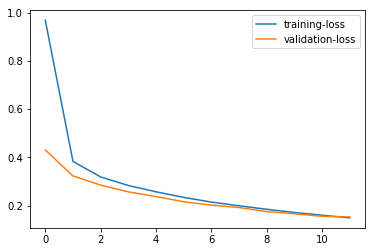

In [10]:
plt.plot(running_loss_history, label='training-loss')
plt.plot(validation_loss_history, label='validation-loss')
plt.legend()
        
        

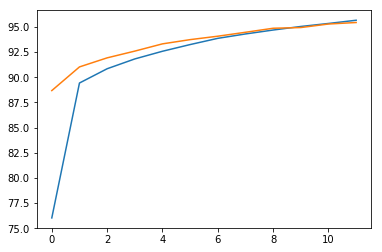

In [11]:
plt.plot(running_correct_history, label='training-accuracy')
plt.plot(validation_accuracy_history, label='validation-accuracy')
